# Clase 1 : Variables y Funciones

Una variable es un nombre al que le asociamos un valor con el propósito de reutilizarlo en el futuro. Toda variable en Julia tiene un tipo y un
valor. 

El tipo de una variable numérica (__Int32__, __Int64__, __Float32__, __Float64__, __BigInt__, __BigFloat__), es importante para poder obtener resultados correctos.

In [2]:
x=1.2
y=1
z=1+7*im
w= 2//3

2//3

In [10]:
typeof(x), typeof(y), typeof(z), typeof(w)

(Float64,Int64,Complex{Int64},Rational{Int64})

In [2]:
w^6

64//729

In [3]:
factorial(55)

LoadError: LoadError: OverflowError()
while loading In[3], in expression starting on line 1

In [4]:
function Nuestro_factorial(n)
    Res = BigInt(1)
    for k in 1:n
        Res = Res * k
    end
    return Res
end


Nuestro_factorial (generic function with 1 method)

In [5]:
Nuestro_factorial(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [6]:
function Nuestro_factorial2(n)
    if n<=1 return BigInt(1) end
    return n*Nuestro_factorial2(n-1)
end


Nuestro_factorial2 (generic function with 1 method)

In [7]:
Nuestro_factorial2(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [8]:
g(n) = n<1 ? BigInt(1) : g(n-1)*n

g (generic function with 1 method)

In [9]:
g(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [10]:
h(n) = prod([k for k in BigInt(1):n])

h (generic function with 1 method)

In [11]:
h(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [12]:
J = [j for j in 1:100]
map((x) -> x^2,J)

100-element Array{Int64,1}:
     1
     4
     9
    16
    25
    36
    49
    64
    81
   100
   121
   144
   169
     ⋮
  7921
  8100
  8281
  8464
  8649
  8836
  9025
  9216
  9409
  9604
  9801
 10000

In [13]:
?map


search: map map! mapfoldr mapfoldl mapslices mapreduce mapreducedim pmap mmap



```
map(f, c...) -> collection
```

Transform collection `c` by applying `f` to each element. For multiple collection arguments, apply `f` elementwise.

```jldoctest
julia> map((x) -> x * 2, [1, 2, 3])
3-element Array{Int64,1}:
 2
 4
 6

julia> map(+, [1, 2, 3], [10, 20, 30])
3-element Array{Int64,1}:
 11
 22
 33
```


In [14]:
[ i^2+ j for i in 1:5, j in 1:4]

5x4 Array{Int64,2}:
  2   3   4   5
  5   6   7   8
 10  11  12  13
 17  18  19  20
 26  27  28  29

In [15]:
alpha = prod([j for j in BigInt(91):100])/(BigInt(2)^(100)*factorial(10))

1.365542638746309922340352215130108835426311908456398214184446260333061218261719e-17

In [16]:
function logFact(n::Int64)
    Res = 0
    for k in 1:n
        Res += log(k)
    end
    return Res
end


logFact (generic function with 1 method)

In [17]:
beta = logFact(100)-(logFact(90)+logFact(10)+100*log(2))
alpha2=exp(beta)

1.3655426387463477e-17

In [18]:
alpha-alpha2

-3.774822690998982271989716767466457544334679230502160862670280039310455322265625e-31

In [19]:
using PyPlot

In [20]:
#We compute the binomial probabilities form scratch
p=0.5

function logFactorial(m::Int64)
  res = 0
  for k in 1:m
    res = res + log(k)
  end
  return res
end


logFactorial (generic function with 1 method)

In [21]:
function binomialProbability(k,N;prob = 0.5)
#returns the binomial probability of exactly k successes with probability p on N trials
#Keyworded arguments
  N < 0 ? error("ERROR: Numero de intentos no puede ser positivo") :
  0 > k ? error("ERROR: k no puede ser negativo") :
  k > N ? error("ERROR: k debe ser menor o igual a N") :
  intermediateRes = logFactorial(N)+(k*log(prob)+(N-k)*log(1-prob))-(logFactorial(N-k)+logFactorial(k))
  return exp(intermediateRes)
end

binomialProbability (generic function with 1 method)

In [22]:
binomialProbability(2,10)
N=100

100

In [23]:
Prueba  = map((j)->binomialProbability(j,N,prob=0.3),0:N)
#How to show a fixed number of significant digits?
for prob in Prueba
  @printf "%.2f " prob
end
sum(Prueba)

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.09 0.08 0.08 0.07 0.06 0.05 0.04 0.03 0.02 0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

1.0000000000000722

In [24]:
#Por ultimo hacemos un dibujo de lo que hemos hecho hasta ahora
using PyPlot
x = [0:1:N;]
y = Prueba
fig = figure("pyplot_barplot",figsize=(10,10))

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f07b5405e50>)

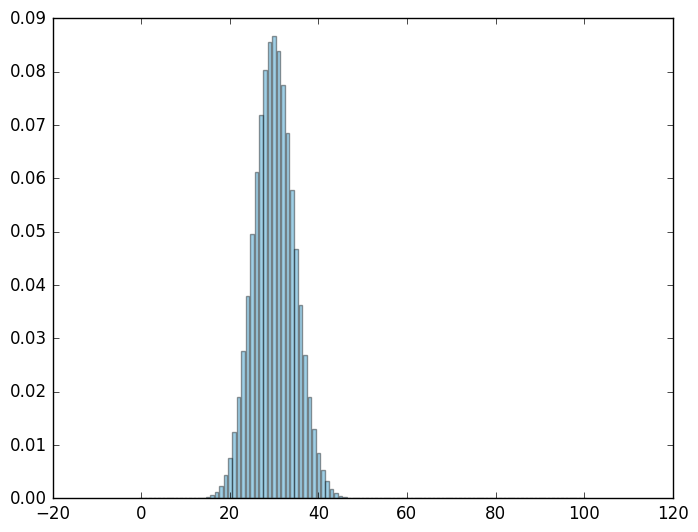

(PyObject <matplotlib.patches.Rectangle object at 0x7f07b52bf710>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b52bfdd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b5250490>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b5250b10>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b525f1d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b525f850>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b525fed0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b526b590>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b526bc10>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b52782d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b5278950>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b5278fd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b5286690>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b5286d10>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b52143d0>,PyObject <matplotlib.pat

In [25]:
b = bar(x,y,color="#0f87bf",align="center",alpha=0.4)

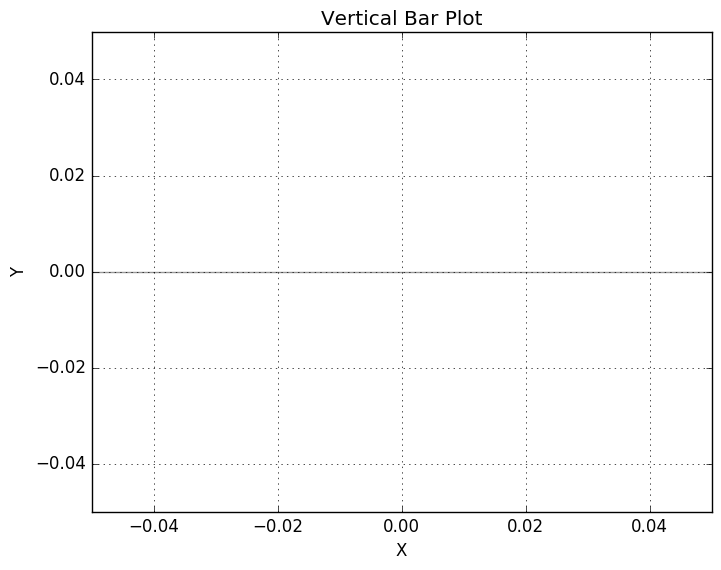

(PyObject <matplotlib.patches.Rectangle object at 0x7f07b4ca5810>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4ca5b10>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4ca5f10>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4cb35d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4cb3c50>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4cbf310>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4cbf990>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4cbfe90>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4c4d6d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4c4dd50>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4c5b410>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4c5ba90>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4c5bf90>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4c667d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b4c66e50>,PyObject <matplotlib.pat

In [26]:
axis("tight")
title("Vertical Bar Plot")
grid("on")
xlabel("X")
ylabel("Y")
prob=0.6
Prueba2  = map((j)->binomialProbability(j,N,prob=prob),0:N)
b = bar(x,Prueba2,color="red",align="center",alpha=0.4)

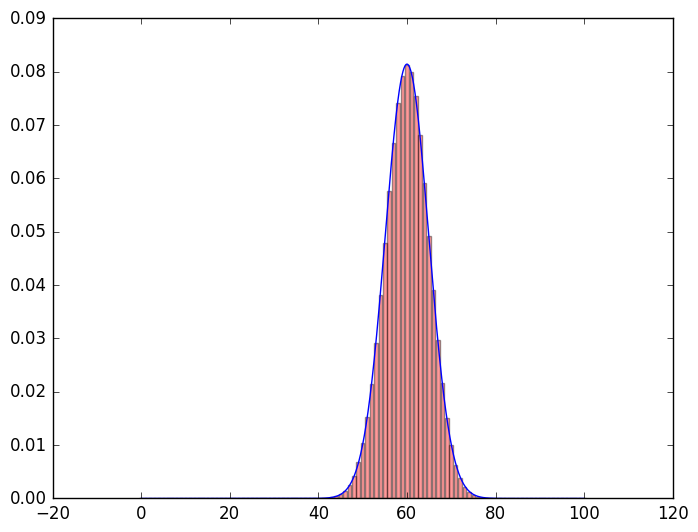

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f07b29a8190>

In [27]:
b = bar(x,Prueba2,color="red",align="center",alpha=0.4)
#Comparemos con la distribucion normal, y veamos pyplot
mu=N*prob
sigmasq = N *prob*(1-prob)
normalDist = (x) -> exp(-(x-mu)^2/(2*sigmasq))*(1/sqrt(2pi*sigmasq))
xHighRes = [0:0.05:N;]
Ys = map(normalDist,xHighRes)
plot(xHighRes,Ys)


#Luego hacemos una simulacion de como deberia comportarse una moneda y comparamos.

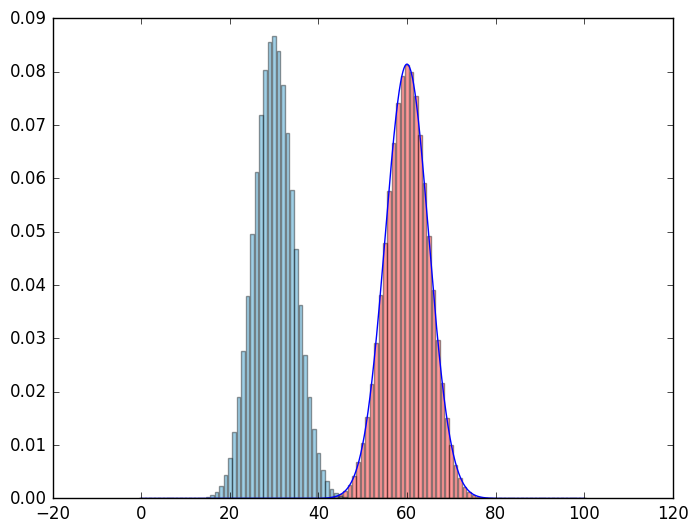

(PyObject <matplotlib.patches.Rectangle object at 0x7f07b1bc24d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1bc2b90>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1bd1250>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1bd18d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1bd1f50>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1b5e610>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1b5ec90>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1b6b350>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1b6b9d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1b6bed0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1b77710>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1b77d90>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1b85450>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1b85ad0>,PyObject <matplotlib.patches.Rectangle object at 0x7f07b1b85fd0>,PyObject <matplotlib.pat

In [31]:
#Comparación de los histogramas
plot(xHighRes,Ys)
b = bar(x,Prueba2,color="red",align="center",alpha=0.4)
b = bar(x,y,color="#0f87bf",align="center",alpha=0.4)